Використовуючи наведений в лекції датасет і код, створіть на основі двошарової нейромережі тришарову. Оцініть її похибку та точність визначення класів.

Після цього використайте для оцінки похибки Mean Squared Error (синтаксис – за посиланням), в якості оптимізатора – Adam (синтаксис – за посиланням). Порівняйте, чи змінилась похибка та точність.

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

In [4]:
#!pip install torchviz

In [5]:
nX, nH1, nH2, nY = 2, 5, 5, 1 #структура тришарової мережі

In [6]:
# Інтерфейс створення нейромереж в Pytorch
model = nn.Sequential(
    nn.Linear(nX, nH1),
    nn.Sigmoid(),
    nn.Linear(nH1, nH2),
    nn.Sigmoid(),   
    nn.Linear(nH2, nY),
    nn.Sigmoid())

In [7]:
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):        
        super(ThreeLayersNet, self).__init__()     # конструктор
         
        self.fc1 = nn.Linear(nX, nH1)             # створення параметрів моделі
        self.fc2 = nn.Linear(nH1, nH2) 
        self.fc3 = nn.Linear(nH2, nY)             # у повнозв'язкових шарах
          
    def forward(self, x):                        # задаємо прямий прохід
        x = self.fc1(x)                          # вихід першого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        x = self.fc2(x)                          # вихід другого шару
        x = nn.Sigmoid()(x) 
        x = self.fc3(x)                          # вихід третього шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        return x

In [8]:
# Генеруємо дані для нашої моделі
X = torch.rand (1200, 2)                       
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

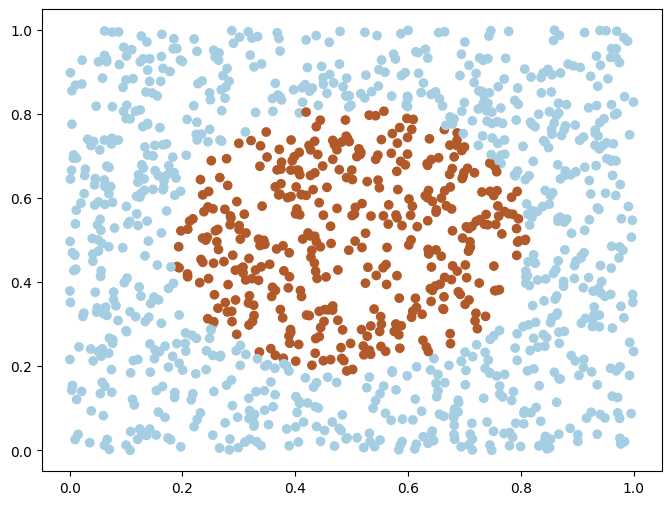

In [9]:
# Візуалізуємо дані
plt.figure (figsize=(8, 6))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired) 
plt.show()

In [10]:
# Функція для навчання моделі
def fit(model, X,Y, batch_size=100, train=True):    
      model.train(train)                                 
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size ) 
       
      for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]                          # поточний батч
        yb = Y[i: i+batch_size]                          # тензори поточного батчу
        y = model(xb)                                    # пряме розповсюдження
        L = loss(y, yb)                                  # похибка
        if train:                                        # в режимі навчання
            optimizer.zero_grad()                        # обнуляємо градієнти,        
            L.backward()                                 # обчислюємо градієнти,            
            optimizer.step()                             # підганяємо параметри
        sumL += L.item()                                 # сумарна похибка
        sumA += (y.round() == yb).float().mean()         # точність визначення окремого класу
         
        return sumL/numB,  sumA/numB

В якості похибки використаємо бінарну крос-ентропію (BCELoss), а оптимізатором буде SGD (стохастичний градієнтний спуск)

In [11]:
model_1 = ThreeLayersNet(2, 5, 5, 1)        # створення екземпляру класу
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.8)

In [12]:
# режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model_1, X,Y) )  

epochs = 1000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model_1, X, Y)                               # по всьому датасету
    
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0520 accuracy: 0.0575
epoch:     0 loss: 0.0520 accuracy: 0.0575
epoch:   100 loss: 0.0520 accuracy: 0.0575
epoch:   200 loss: 0.0520 accuracy: 0.0575
epoch:   300 loss: 0.0520 accuracy: 0.0575
epoch:   400 loss: 0.0520 accuracy: 0.0575
epoch:   500 loss: 0.0520 accuracy: 0.0575
epoch:   600 loss: 0.0520 accuracy: 0.0575
epoch:   700 loss: 0.0520 accuracy: 0.0575
epoch:   800 loss: 0.0520 accuracy: 0.0575
epoch:   900 loss: 0.0520 accuracy: 0.0575
epoch:   999 loss: 0.0520 accuracy: 0.0575


In [13]:
print(model_1)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


In [14]:
dict(model_1.named_parameters())

{'fc1.weight': Parameter containing:
 tensor([[ 0.5916, -0.1983],
         [-0.6924, -0.1321],
         [-0.6687, -0.4479],
         [-0.5709, -0.4923],
         [-0.3361, -0.4016]], requires_grad=True),
 'fc1.bias': Parameter containing:
 tensor([-0.1023, -0.0655, -0.2203,  0.6177, -0.7049], requires_grad=True),
 'fc2.weight': Parameter containing:
 tensor([[-0.1942,  0.0081,  0.0620,  0.4244, -0.2198],
         [-0.3659,  0.2718,  0.1068, -0.1957, -0.0722],
         [ 0.1753, -0.1311, -0.4244,  0.0809, -0.2277],
         [-0.1635,  0.3068,  0.0580, -0.2586, -0.4052],
         [-0.1391, -0.2790, -0.3782,  0.3707, -0.0873]], requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([0.1716, 0.2231, 0.2727, 0.0164, 0.1309], requires_grad=True),
 'fc3.weight': Parameter containing:
 tensor([[-0.3373, -0.2587,  0.3475, -0.1597, -0.1983]], requires_grad=True),
 'fc3.bias': Parameter containing:
 tensor([-0.2785], requires_grad=True)}

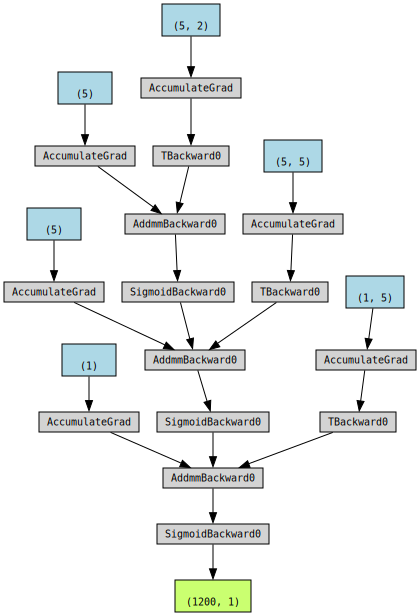

In [15]:
torchviz.make_dot(model_1(X), params = dict(model.named_parameters()))

використаємо для оцінки похибки Mean Squared Error, в якості оптимізатора – Adam

In [16]:
model_2 = ThreeLayersNet(2, 5, 5, 1)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)

In [17]:
# режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model_2, X,Y) )
epochs = 1000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model_2, X, Y)                               # по всьому датасету
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0186 accuracy: 0.0575
epoch:     0 loss: 0.0186 accuracy: 0.0575
epoch:   100 loss: 0.0178 accuracy: 0.0575
epoch:   200 loss: 0.0178 accuracy: 0.0575
epoch:   300 loss: 0.0178 accuracy: 0.0575
epoch:   400 loss: 0.0178 accuracy: 0.0575
epoch:   500 loss: 0.0178 accuracy: 0.0575
epoch:   600 loss: 0.0178 accuracy: 0.0575
epoch:   700 loss: 0.0178 accuracy: 0.0575
epoch:   800 loss: 0.0178 accuracy: 0.0575
epoch:   900 loss: 0.0178 accuracy: 0.0575
epoch:   999 loss: 0.0178 accuracy: 0.0575


In [18]:
print(model_2)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


In [19]:
dict(model_2.named_parameters())

{'fc1.weight': Parameter containing:
 tensor([[ 1.0969,  0.8342],
         [ 0.6356,  0.0363],
         [-0.7711, -0.4242],
         [ 0.6269,  0.6576],
         [-0.3303, -0.1733]], requires_grad=True),
 'fc1.bias': Parameter containing:
 tensor([-0.9688,  0.2793, -0.0012, -0.3141, -0.5608], requires_grad=True),
 'fc2.weight': Parameter containing:
 tensor([[ 0.6745,  0.4934, -0.6008,  0.1785, -0.2606],
         [ 0.7338,  0.0625,  0.0933,  0.2377,  0.0262],
         [ 0.4809, -0.0211, -0.2431,  0.6336,  0.1797],
         [ 0.0658,  0.4232, -0.5249,  0.5990, -0.3250],
         [-0.5071,  0.2329,  0.3361, -0.4974,  0.2075]], requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([-0.1251, -0.0294, -0.0640,  0.3438,  0.2232], requires_grad=True),
 'fc3.weight': Parameter containing:
 tensor([[-0.3798, -0.5230, -0.2106, -0.1731,  0.2966]], requires_grad=True),
 'fc3.bias': Parameter containing:
 tensor([-0.1407], requires_grad=True)}

Тришарова нейромережа з функцією втрат - Бінарна крос-ентропія або лог-лосс (Binary Cross-Enthropy, Log-loss) і оптимізатором Стохастичний градієнтний спуск (Steep Gradient Descent, SGD)

epoch:   999 loss: 0.0520 accuracy: 0.0575

Тришарова нейромережа з функцією втрат - Середньоквадратична похибка (Mean Squared Error, MSE) і оптимізатором Адаптивна оцінка моментів (Adam)

epoch:   999 loss: 0.0178 accuracy: 0.0575

Отримано приблизно однакові результати.